# 4. 연습하기(1)

4번 연습하기(1) 혹은 연습하기(2) 중 하나를 선택해주세요

In [1]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 7.0 MB/s            
     |████████████████████████████████| 157 kB 91.5 MB/s            
     |████████████████████████████████| 181 kB 72.9 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 63 kB 3.1 MB/s             
     |████████████████████████████████| 139 kB 75.1 MB/s            
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=acca076ea502fc4c1ed53b89dbf188c294baf96e944eab9d01fb37abd3a32bbc
  Stored in directory: /aiffel/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import os
import wandb
from wandb.keras import WandbCallback

## 4.1. 데이터셋 준비

In [3]:
# Data load

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Validation Set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2) # 테스트 사이즈는 조절해주세요

## 4.2. 데이터 분석

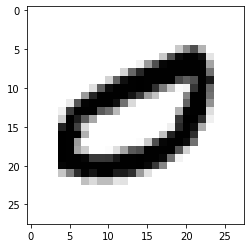

In [5]:
plt.imshow(X_train[1],cmap=plt.cm.binary)
plt.show()

In [6]:
print(y_train[1])

0


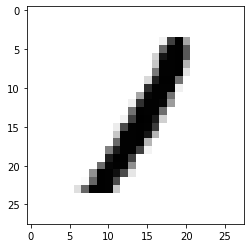

16376 번째 이미지의 숫자는 바로  1 입니다.


In [7]:
index=random.randint(0,20000)
plt.imshow(X_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [8]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(48000, 28, 28)
(12000, 28, 28)
(10000, 28, 28)
(48000,)
(12000,)
(10000,)


In [9]:
print('최소값:',np.min(X_train), ' 최대값:',np.max(X_train))

최소값: 0  최대값: 255


## 4.3. 데이터 전처리

In [10]:
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0
print('최소값:',np.min(X_train), ' 최대값:',np.max(X_train))

최소값: 0.0  최대값: 1.0


In [11]:
print("Before Reshape - x_train shape: {}".format(X_train.shape))
print("Before Reshape - x_val shape: {}".format(X_val.shape))
print("Before Reshape - x_test shape: {}".format(X_test.shape))

X_train = X_train.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
X_val = X_val.reshape( -1, 28, 28, 1)
X_test = X_test.reshape( -1, 28, 28, 1)

print("After Reshape - x_train shape: {}".format(X_train.shape))
print("After Reshape - x_val shape: {}".format(X_val.shape))
print("After Reshape - x_test shape: {}".format(X_test.shape))

Before Reshape - x_train shape: (48000, 28, 28)
Before Reshape - x_val shape: (12000, 28, 28)
Before Reshape - x_test shape: (10000, 28, 28)
After Reshape - x_train shape: (48000, 28, 28, 1)
After Reshape - x_val shape: (12000, 28, 28, 1)
After Reshape - x_test shape: (10000, 28, 28, 1)


## 4.4. WanDB init 해보기

In [ ]:
run = wandb.init(project = "hi",
                 entity = "hchang",
                 config = {
                     
                 })

config = wandb.config

wandb: Currently logged in as: hongdune. Use `wandb login --relogin` to force relogin


## 4.5. 모델 설계하기

In [ ]:
# 모델 설계

<YOUR CODE>

Model에 추가된 Layer 개수:  7


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [ ]:
model.compile(<YOUR CODE>)

## 4.6. 모델 학습하기

In [ ]:
val_images, val_labels = X_test[:32], y_test[:32]

model.fit(X_train, y_train,
          epochs=config.epochs,
          vvalidation_data = (X_val, y_val),
          callbacks = [<YOUR CODE>]
          )

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.
wandb: WARNING The data_type argument of wandb.keras.WandbCallback is deprecated and will be removed in a future release. Please use input_type instead.
wandb: WARNING Setting input_type = data_type.


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
Epoch 1/5
1499/1500 [============================>.] - ETA: 0s - loss: 0.2174 - accuracy: 0.9339

wandb: WARNING No validation_data set, pass a generator to the callback.


1500/1500 [==============================] - 24s 15ms/step - loss: 0.2173 - accuracy: 0.9339 - _timestamp: 1659414432.0000 - _runtime: 380.0000
Epoch 2/5
1499/1500 [============================>.] - ETA: 0s - loss: 0.0683 - accuracy: 0.9793

wandb: WARNING No validation_data set, pass a generator to the callback.


1500/1500 [==============================] - 24s 16ms/step - loss: 0.0684 - accuracy: 0.9793 - _timestamp: 1659414456.0000 - _runtime: 404.0000
Epoch 3/5
1497/1500 [============================>.] - ETA: 0s - loss: 0.0502 - accuracy: 0.9846

wandb: WARNING No validation_data set, pass a generator to the callback.


1500/1500 [==============================] - 24s 16ms/step - loss: 0.0503 - accuracy: 0.9846 - _timestamp: 1659414480.0000 - _runtime: 428.0000
Epoch 4/5
1500/1500 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9881

wandb: WARNING No validation_data set, pass a generator to the callback.


1500/1500 [==============================] - 24s 16ms/step - loss: 0.0387 - accuracy: 0.9881 - _timestamp: 1659414504.0000 - _runtime: 452.0000
Epoch 5/5
1498/1500 [============================>.] - ETA: 0s - loss: 0.0318 - accuracy: 0.9902

wandb: WARNING No validation_data set, pass a generator to the callback.


1500/1500 [==============================] - 23s 15ms/step - loss: 0.0318 - accuracy: 0.9902 - _timestamp: 1659414527.0000 - _runtime: 475.0000


## 4.7. 모델 평가하기

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

wandb.log(<YOUR CODE>)

313/313 - 2s - loss: 0.0372 - accuracy: 0.9872 - 2s/epoch - 6ms/step
test_loss: 0.03720688074827194 
test_accuracy: 0.9872000217437744


In [ ]:
wandb.finish()

Test Accuracy Rate:,▁
Test Error Rate:,▁
accuracy,▁▇▇██
epoch,▁▃▅▆█
loss,█▂▂▁▁
GFLOPS,0.0007
Test Accuracy Rate:,98.72
Test Error Rate:,1.28
accuracy,0.99025
epoch,4
loss,0.0318
